In [6]:
import pandas as pd
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [2]:
df1 = pd.read_csv("countypres_2000-2020.csv")
df1.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,AL GORE,DEMOCRAT,4942,17208,20220315,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993,17208,20220315,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,RALPH NADER,GREEN,160,17208,20220315,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,OTHER,OTHER,113,17208,20220315,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,AL GORE,DEMOCRAT,13997,56480,20220315,TOTAL


In [3]:
df2 = pd.read_csv("anes_timeseries_cdf_csv_20220916.csv")
df2.head()

/Users/dylanmontemayor/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (4,5,6,7,8,9,13,14,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,38,39,40,41,42,43,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,233,254,275,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,

,Version,VCF0004,VCF0006,VCF0006a,VCF0009x,VCF0010x,VCF0011x,VCF0009y,VCF0010y,VCF0011y,...,VCF9272,VCF9273,VCF9274,VCF9275,VCF9277,VCF9278,VCF9279,VCF9280,VCF9281,VCF9282
0,ANES_CDF_VERSION:2022-Sep-16,1948,1001,19481001,1,1,1,1,1,1,...,,,,,,,,,,
1,ANES_CDF_VERSION:2022-Sep-16,1948,1002,19481002,1,1,1,1,1,1,...,,,,,,,,,,
2,ANES_CDF_VERSION:2022-Sep-16,1948,1003,19481003,1,1,1,1,1,1,...,,,,,,,,,,
3,ANES_CDF_VERSION:2022-Sep-16,1948,1004,19481004,1,1,1,1,1,1,...,,,,,,,,,,
4,ANES_CDF_VERSION:2022-Sep-16,1948,1005,19481005,1,1,1,1,1,1,...,,,,,,,,,,


In [4]:
df1.dtypes

year                int64
state              object
state_po           object
county_name        object
county_fips       float64
office             object
candidate          object
party              object
candidatevotes      int64
totalvotes          int64
version             int64
mode               object
dtype: object

In [5]:
df2.dtypes

Version     object
VCF0004      int64
VCF0006      int64
VCF0006a     int64
VCF0009x    object
             ...  
VCF9278     object
VCF9279     object
VCF9280     object
VCF9281     object
VCF9282     object
Length: 1030, dtype: object

Draft of a random forest model

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

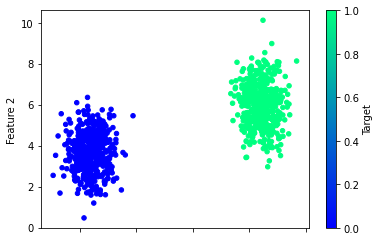

In [11]:
#The make_blobs is used to create sample values and contains many parameters that change the shape and values of the sample dataset.
# Generate dummy dataset
from sklearn.datasets import make_blobs
import sklearn as skl
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [12]:
#Use sklearn to split dataset for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)

In [13]:
#Create scaler instance
X_scaler=skl.preprocessing.StandardScaler()

#Fit the scaler
X_scaler.fit(X_train)

#Scale the data
X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 1.000
